In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # Might not need this


<bound method NDFrame.head of                     id treasuryName             bond_id                 date  \
0   100787684980558802  US Treasury  100787684980558802  2023-12-29 00:00:00   
1   100787684980558802  US Treasury  100787684980558802  2024-01-02 00:00:00   
2   100787684980558802  US Treasury  100787684980558802  2024-01-03 00:00:00   
3   100787684980558802  US Treasury  100787684980558802  2024-01-04 00:00:00   
4   100787684980558802  US Treasury  100787684980558802  2024-01-05 00:00:00   
..                 ...          ...                 ...                  ...   
63  100787684980558802  US Treasury  100787684980558802  2024-04-02 00:00:00   
64  100787684980558802  US Treasury  100787684980558802  2024-04-03 00:00:00   
65  100787684980558802  US Treasury  100787684980558802  2024-04-04 00:00:00   
66  100787684980558802  US Treasury  100787684980558802  2024-04-05 00:00:00   
67  100787684980558802  US Treasury  100787684980558802  2024-04-08 00:00:00   

    1_mon

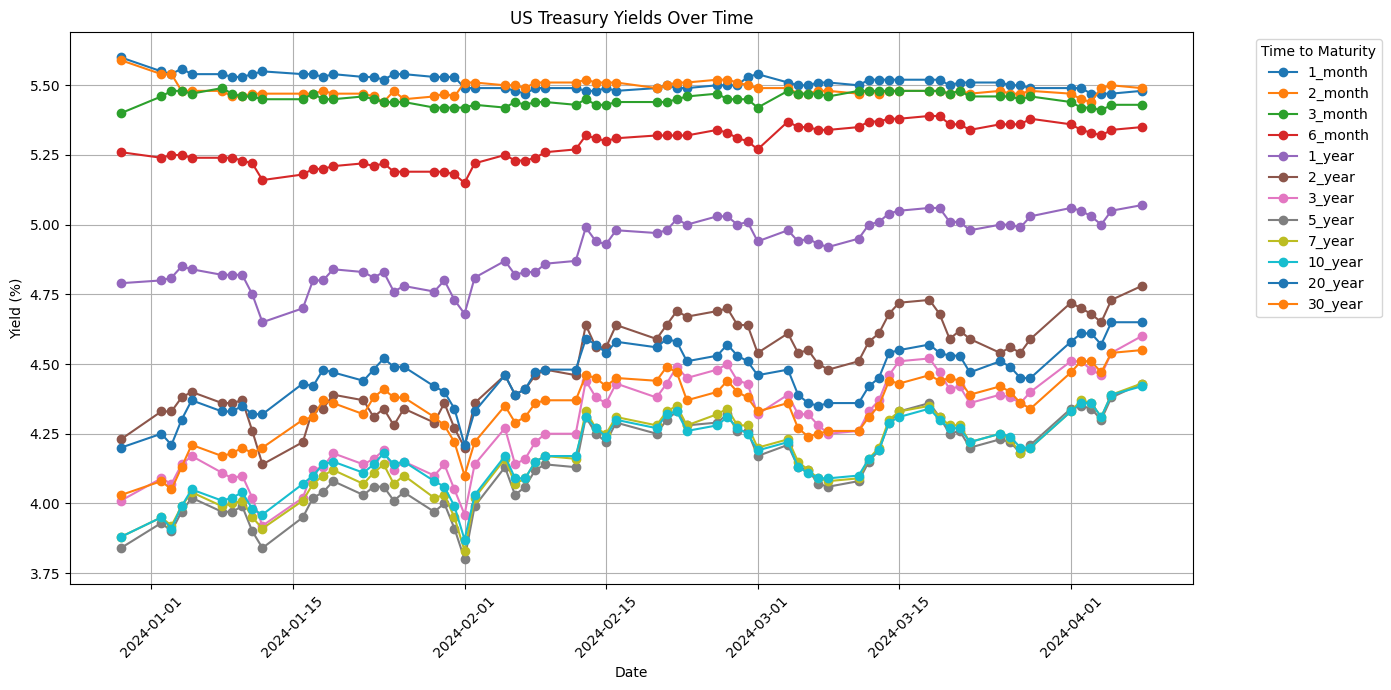

In [ ]:
filePath = "../data/Bonds-data.csv"
data = pd.read_csv(filePath)

print(data.head)


data['date'] = pd.to_datetime(data['date'])

# Select only the relevant columns
yield_columns = ['1_month', '2_month', '3_month', '6_month', '1_year', 
                 '2_year', '3_year', '5_year', '7_year', '10_year', 
                 '20_year', '30_year']
selected_data = data[['date'] + yield_columns]

# Plot a line chart
plt.figure(figsize=(14, 7))
for column in yield_columns:
    plt.plot(selected_data['date'], selected_data[column], marker='o', label=column)

plt.title("US Treasury Yields Over Time")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.legend(title="Time to Maturity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Bonds.png")
plt.show()


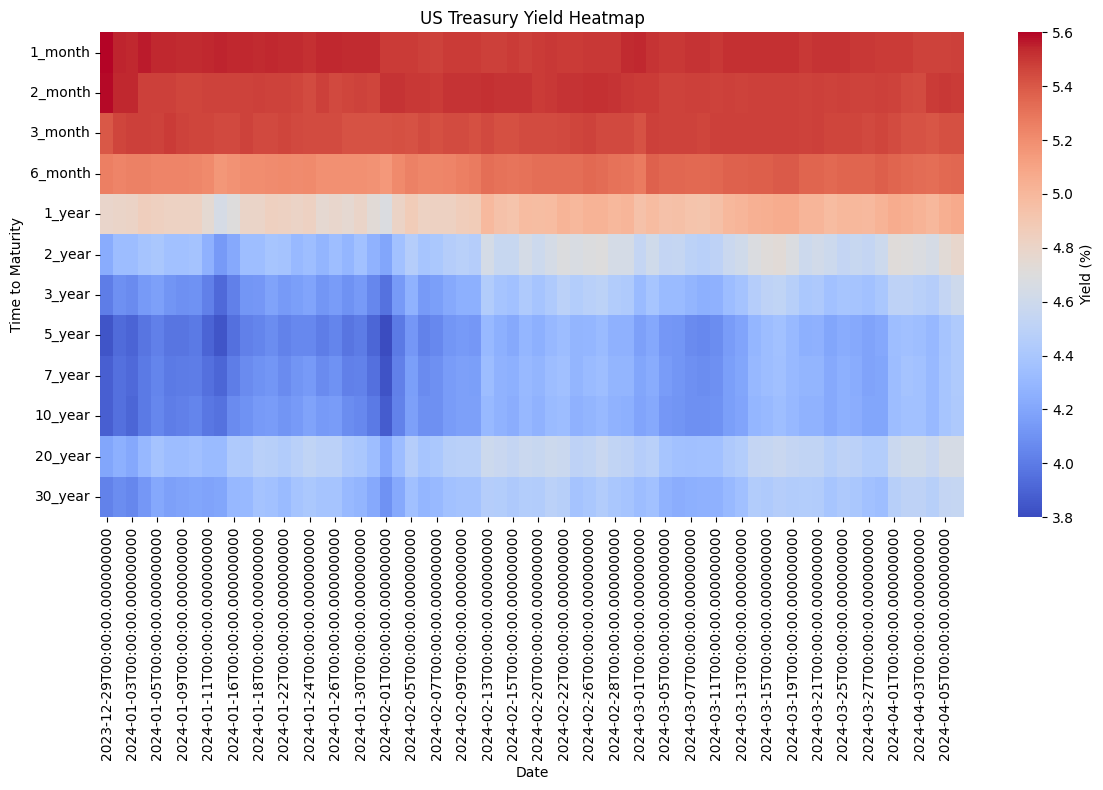

In [31]:
heatmap_data = selected_data.set_index('date').T  # Transpose for easier heatmap plotting

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar_kws={"label": "Yield (%)"})
plt.title("US Treasury Yield Heatmap")
plt.xlabel("Date")
plt.ylabel("Time to Maturity")
plt.tight_layout()
plt.show()

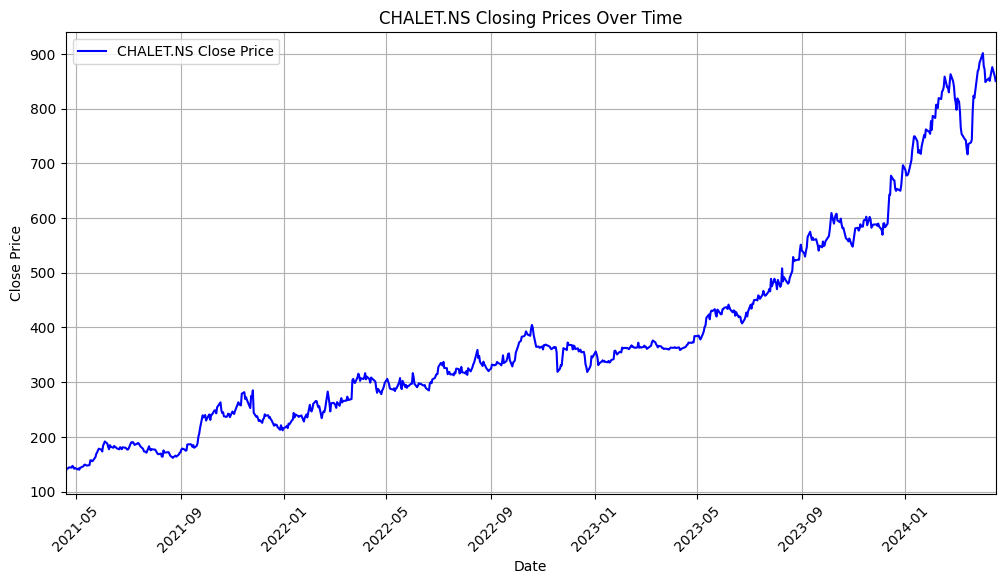

In [ ]:

filePath = "../data/Companies-data.csv"
data = pd.read_csv(filePath)

data['date'] = pd.to_datetime(data['date'])

# Filter data for a single company
company_symbol = "CHALET.NS"
filtered_data = data[data['symbol'] == company_symbol]

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['close'], label=f'{company_symbol} Close Price', color='blue')
plt.title(f"{company_symbol} Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.xlim(filtered_data['date'].min(), filtered_data['date'].max())
plt.show()

In [ ]:
#TODO make another graph perhaps
filePath = "../data/company-info-data.csv"
data = pd.read_csv(filePath)

data['date'] = pd.to_datetime(data['date'])